In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
# Create a StandardScaler instance to normalize the data
from sklearn.preprocessing import MinMaxScaler
import math


In [2]:
print(os.listdir('/kaggle/input/kdd-cup-1999-data'))

['kddcup.data.gz', 'kddcup.data', 'kddcup.testdata.unlabeled', 'training_attack_types', 'kddcup.data.corrected', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'corrected', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent', 'corrected.gz', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.data_10_percent.gz', 'kddcup.names', 'kddcup.data_10_percent_corrected', 'typo-correction.txt', 'kddcup.data_10_percent', 'kddcup.testdata.unlabeled_10_percent.gz']


In [3]:
with open("/kaggle/input/kdd-cup-1999-data/kddcup.names",'r') as f:
    content = f.read()
    print(content)

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [4]:
cols = []
content = content.split("\n")[1:]
for c in content:
    if len(c) > 1:
        print(c.split(":")[0])
        cols.append(c.split(":")[0])
cols.append("target")

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate


In [5]:
cols


['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'target']

In [6]:
len(cols)


42

# Preparing the dataset

In [7]:
training_data=pd.read_csv("/kaggle/input/kdd-cup-1999-data/kddcup.data_10_percent.gz",names=cols)

In [8]:
testing_data=pd.read_csv("/kaggle/input/kdd-cup-1999-data/corrected.gz",names=cols)

In [9]:
len(training_data)

494021

In [10]:
len(testing_data)

311029

In [11]:
training_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [12]:
testing_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311025,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311026,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.
311027,0,udp,private,SF,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal.


In [13]:
len(training_data['target'].value_counts())

23

In [14]:
len(testing_data['target'].value_counts())

38

In [15]:
training_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [16]:
training_data['target'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [17]:
testing_data['target'].unique()

array(['normal.', 'snmpgetattack.', 'named.', 'xlock.', 'smurf.',
       'ipsweep.', 'multihop.', 'xsnoop.', 'sendmail.', 'guess_passwd.',
       'saint.', 'buffer_overflow.', 'portsweep.', 'pod.', 'apache2.',
       'phf.', 'udpstorm.', 'warezmaster.', 'perl.', 'satan.', 'xterm.',
       'mscan.', 'processtable.', 'ps.', 'nmap.', 'rootkit.', 'neptune.',
       'loadmodule.', 'imap.', 'back.', 'httptunnel.', 'worm.',
       'mailbomb.', 'ftp_write.', 'teardrop.', 'land.', 'sqlattack.',
       'snmpguess.'], dtype=object)

# Encoding (Categorical to Numerical)

In [18]:
from sklearn.preprocessing import LabelEncoder
def encode_and_split(training_df,testing_df):
    #1-drop in-consistent targets in testing_data
    
    # create a list of values to keep
    my_list = training_df['target'].unique()

    # drop rows with values in column 'target' that are not in the list
    df_filtered = testing_df.loc[testing_df['target'].isin(my_list)]
    
    
    #get length of training and testing to split after encoding
    train_size=len(training_df)
    test_size=len(df_filtered)
    
    # concatenate the two data frames vertically to encode them
    concatenated_df = pd.concat([training_df, testing_df])
    
    
    #label encode targets
    
    # create a label encoder object
    le = LabelEncoder()

    # fit the label encoder to the 'target' column in the data frame
    le.fit(concatenated_df['target'])
    


    #one hot encode
    concatenated_df=pd.get_dummies(concatenated_df, columns=['protocol_type','service','flag'])
    
    # transform the 'target' column using the label encoder
    concatenated_df['target_encoded'] = le.transform(concatenated_df['target'])
    mapping = dict(zip(le.transform(le.classes_), le.classes_))

        
    #split into training , testing 
    training_df=concatenated_df.iloc[:train_size]
    testing_df=concatenated_df.iloc[train_size:]
    
    
    return training_df,testing_df,mapping
    
    



In [19]:
# from sklearn.preprocessing import LabelEncoder
# def encode_and_split(training_df,testing_df):
#     #1-drop in-consistent targets in testing_data
    
#     # create a list of values to keep
#     my_list = training_df['target'].unique()

#     # drop rows with values in column 'target' that are not in the list
#     df_filtered = testing_df.loc[testing_df['target'].isin(my_list)]


    
    
    
#     #get length of training and testing to split after encoding
#     train_size=len(training_df)
#     test_size=len(df_filtered)
    
#     # concatenate the two data frames vertically to encode them
#     concatenated_df = pd.concat([training_df, testing_df])
    
    
#     #label encode targets
    
#     # create a label encoder object
#     le = LabelEncoder()


#     # Encode the 'color' and 'size' columns in the dataframe
#     concatenated_df['protocol_type'] = le.fit_transform(concatenated_df['protocol_type'])
#     concatenated_df['service'] = le.fit_transform(concatenated_df['service'])
#     concatenated_df['flag'] = le.fit_transform(concatenated_df['flag'])
    
#     concatenated_df['target_encoded'] = le.fit_transform(concatenated_df['target'])
#     # get the mapping of the encoded values to the original categorical values
#     mapping = dict(zip(le.transform(le.classes_), le.classes_))

# #     concatenated_df=concatenated_df.drop('target',axis=1)

    
#     #split into training , testing 
#     training_df=concatenated_df.iloc[:train_size]
#     testing_df=concatenated_df.iloc[train_size:]
    
    
#     return training_df,testing_df,mapping
    
    



In [20]:
training_df,testing_df,mapping=encode_and_split(training_data,testing_data)

In [21]:
training_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,target_encoded
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
494017,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
494018,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16
494019,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16


In [22]:
mapping

{0: 'apache2.',
 1: 'back.',
 2: 'buffer_overflow.',
 3: 'ftp_write.',
 4: 'guess_passwd.',
 5: 'httptunnel.',
 6: 'imap.',
 7: 'ipsweep.',
 8: 'land.',
 9: 'loadmodule.',
 10: 'mailbomb.',
 11: 'mscan.',
 12: 'multihop.',
 13: 'named.',
 14: 'neptune.',
 15: 'nmap.',
 16: 'normal.',
 17: 'perl.',
 18: 'phf.',
 19: 'pod.',
 20: 'portsweep.',
 21: 'processtable.',
 22: 'ps.',
 23: 'rootkit.',
 24: 'saint.',
 25: 'satan.',
 26: 'sendmail.',
 27: 'smurf.',
 28: 'snmpgetattack.',
 29: 'snmpguess.',
 30: 'spy.',
 31: 'sqlattack.',
 32: 'teardrop.',
 33: 'udpstorm.',
 34: 'warezclient.',
 35: 'warezmaster.',
 36: 'worm.',
 37: 'xlock.',
 38: 'xsnoop.',
 39: 'xterm.'}

In [23]:
print(f'precentage of unique data is {(len(training_df)-len(training_df.drop_duplicates()))/len(training_df)*100} %')

precentage of unique data is 70.53040255373759 %


In [24]:
def remove_duplicates(df):
    # count the duplicate rows and add this count as a new column
    duplicates_count = df.groupby(list(df.columns)).size().reset_index().rename(columns={0:'Duplicate_count'})
    df_with_counts = pd.merge(df, duplicates_count, on=list(df.columns), how='left')
    return df_with_counts.drop_duplicates()

In [25]:
training_df , testing_df = remove_duplicates(training_df),remove_duplicates(testing_df)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1442: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  return df.reset_index(level=level, drop=drop)


In [26]:
training_df['Duplicate_count'].value_counts()

1      126209
2        8251
3        3625
4        2165
5        1375
        ...  
148         1
127         1
153         1
111         1
59          1
Name: Duplicate_count, Length: 147, dtype: int64

<AxesSubplot:>

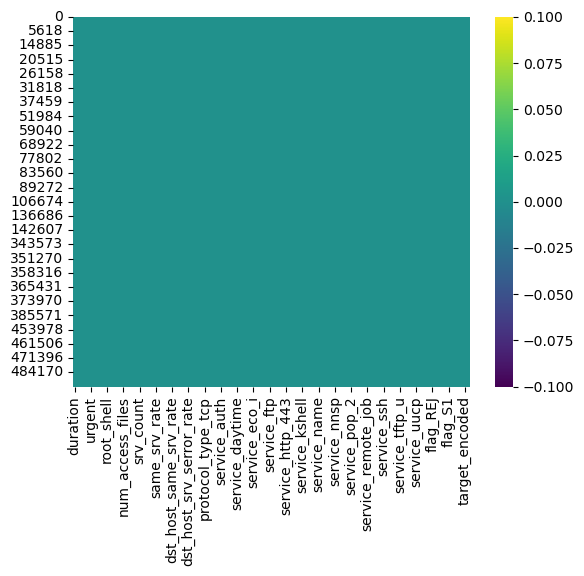

In [27]:
sns.heatmap(training_df.isna(), cmap='viridis')

In [28]:
training_df['target'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: target, dtype: int64

In [29]:
training_df['target_encoded'].value_counts()

16    87832
14    51820
1       968
32      918
25      906
34      893
7       651
27      641
20      416
19      206
15      158
4        53
2        30
35       20
8        19
6        12
23       10
9         9
3         8
12        7
18        4
17        3
30        2
Name: target_encoded, dtype: int64

In [30]:
training_df.corr()['target_encoded'].sort_values()

dst_host_serror_rate       -0.326148
srv_serror_rate            -0.325529
dst_host_srv_serror_rate   -0.325256
flag_S0                    -0.325138
serror_rate                -0.323583
                              ...   
wrong_fragment              0.469979
target_encoded              1.000000
num_outbound_cmds                NaN
is_host_login                    NaN
service_icmp                     NaN
Name: target_encoded, Length: 121, dtype: float64

num_outbound_cmds                   NaN
is_host_login                       NaN
so dropping them will affect nothing

In [31]:
training_df.drop(inplace=True,columns=['num_outbound_cmds','is_host_login','service_icmp'])
testing_df.drop(inplace=True,columns=['num_outbound_cmds','is_host_login','service_icmp'])

In [32]:
training_df['target_encoded'].value_counts()

16    87832
14    51820
1       968
32      918
25      906
34      893
7       651
27      641
20      416
19      206
15      158
4        53
2        30
35       20
8        19
6        12
23       10
9         9
3         8
12        7
18        4
17        3
30        2
Name: target_encoded, dtype: int64

# Data preperation and visualization

In [33]:
#split the data
X_train=training_df.drop(['target_encoded','target'],axis=1).values
y_train=training_df[['target_encoded','target']].values

X_test=testing_df.drop(['target_encoded','target'],axis=1).values
y_test=testing_df[['target_encoded','target']].values


In [34]:
np.unique(y_train[:,0])

array([1, 2, 3, 4, 6, 7, 8, 9, 12, 14, 15, 16, 17, 18, 19, 20, 23, 25, 27,
       30, 32, 34, 35], dtype=object)

In [35]:
X_train

array([[0.000e+00, 1.810e+02, 5.450e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 2.390e+02, 4.860e+02, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 2.350e+02, 1.337e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 2.030e+02, 1.200e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 2.910e+02, 1.200e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 2.190e+02, 1.234e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1),copy=True)
# Normalize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [37]:
X_train

array([[0.00000000e+00, 2.61041764e-07, 1.05713002e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.44690506e-07, 9.42688423e-05, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.38921627e-07, 2.59336301e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.92770597e-07, 2.32762574e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.19685930e-07, 2.32762574e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.15846112e-07, 2.39357513e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

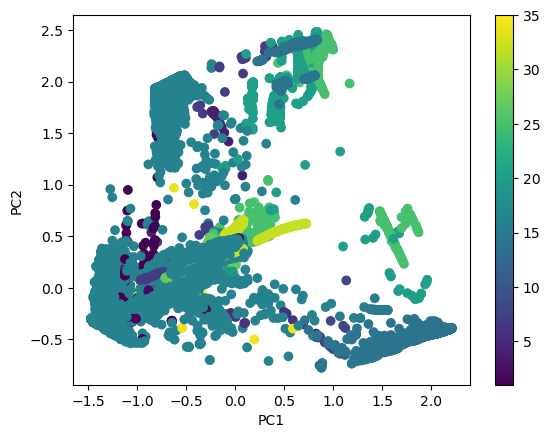

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)

X_transformed = pca.fit_transform(X_train)
# Create a scatter plot of the transformed data, using different colors for each label
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train[:,0])

# Add a colorbar to the plot
plt.colorbar()

# Add labels for the x and y axes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()


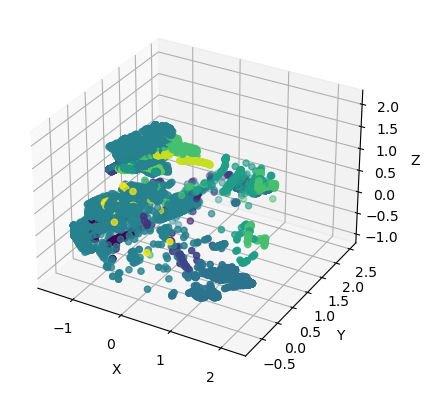

In [39]:
# create a 3D plot
from mpl_toolkits.mplot3d import Axes3D

# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2],c=y_train[:,0])

# set the labels of the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# show the plot
plt.show()

# K-Means

In [40]:
from tqdm import tqdm
import random
from scipy.spatial.distance import cdist

class K_Means:
    def __init__(self, k=2, max_iter=300):
        self.k = k
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}        
        
        
        # K-Means++ initialization
        first_centroid = random.choice(data)
        self.centroids[0] = first_centroid
        for i in tqdm(range(1, self.k)):
            distances = cdist(data, np.array(list(self.centroids.values())))
            min_distances = np.min(distances, axis=1)
            probs = min_distances / np.sum(min_distances)
            new_centroid_idx = np.random.choice(len(data), p=probs)

            new_centroid = data[new_centroid_idx]
            self.centroids[i] = new_centroid


        
        prev_centroids = None

        for i in tqdm(range(self.max_iter)):
            self.classifications = {}
            self.classifications_index={}

            for s in range(self.k):
                self.classifications[s] = []
                self.classifications_index[s]=[]

            for idx,x in enumerate(data):
                distances = cdist(np.array([x]), np.array(list(self.centroids.values())))
                classification = np.argmin(distances)
                self.classifications[classification].append(x)
                self.classifications_index[classification].append(idx)

            prev_centroids = self.centroids.copy()

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

                
            centroid_movement = 0 # sum of the movement of all centroids
            for j in prev_centroids:
                centroid_movement += np.linalg.norm(prev_centroids[j] - self.centroids[j])
            
            
            print(f'centroid moved = {centroid_movement}')
            
            
            # Check if convergence criterion is met
            if centroid_movement < 1e-4:
                print(f"K-means converged after {i} iterations")
                break

                
        return self.centroids,self.classifications_index

    def predict(self,data):
        cluster_dict={}
        for i in range(0,self.k):
            cluster_dict[i]=[]
        for idx,x in enumerate(data):
            distances = cdist(np.array([x]), np.array(list(self.centroids.values())))
            classification = np.argmin(distances)
            cluster_dict[classification].append(idx)
        return cluster_dict

In [41]:
def max_matching(clusters_dict,labels):
    clusters={}
    for idx , x in clusters_dict.items():
        if x: #if a cluster has members
            cluster=labels[x][:,0].astype(np.int64)
        else:
            clusters[idx]=[None,0]
            continue
        counts = np.bincount(cluster)
        # get the most repeated number
        most_repeated_num = np.argmax(counts)
        
        clusters[idx]=[most_repeated_num,counts[most_repeated_num]]
    return clusters


In [42]:
def calculate_presicion(cluster_dict,majority_dict):
    p=[]
    for idx,c in cluster_dict.items():
        if len(c) > 0:
            p.append(majority_dict[idx][1]/len(c))
        else:
            p.append(1e-3)
    return p

def calculate_recall(majority_dict,labels):
    recall=[]
    # count the number of occurrences of each integer in the array
    counts = np.bincount(labels[:,0].astype(int))
    for idx,c in majority_dict.items():
        if majority_dict[idx][1] > 0 and counts[majority_dict[idx][0]]>0:
            recall.append(majority_dict[idx][1]/counts[majority_dict[idx][0]])
        else:
            recall.append(1e-3)
    return recall
       
    
def F_measure(presicion,recall):
    F=[]
    for i in range(len(presicion)):
        F.append((2*presicion[i]*recall[i])/(presicion[i]+recall[i]))
    F=np.array(F)
    return np.sum(F)/len(F)
    
    
def condtional_entropy(cluster_dict,labels):
    entropys=[]
    counts_of_all = np.bincount(labels[:,0].astype(int))
    size_of_clusters=[]
    keys=np.unique(labels[:,0])
    
    for idx,c in cluster_dict.items():
        
        in_cluster_count=np.bincount(labels[c,0].astype(int))
        size_of_clusters.append(len(c))
        
        result=0
        for key in keys :
            
            if key < len(in_cluster_count): #class doesn't exist in this cluster
                
#                 print(f'for cluster={idx} fork key = {key} size = {in_cluster_count[key]} and the size of cluster is ={size_of_clusters[idx]}')
                eq=in_cluster_count[key]/size_of_clusters[idx]

                if eq == 0.0:
                    continue

                result+=-eq*math.log2(eq)
#         print()
        entropys.append(result)
        
    print('the conditional entropy of T given clustering C')
    print(entropys)
    print()
    
    size_of_samples=sum(size_of_clusters)
    total_entropy=0
    for idx,nij in enumerate(size_of_clusters):
        total_entropy+=(nij/size_of_samples)*entropys[idx]

    return total_entropy



def evaluation(cluster_dict,majority_dict,labels):
    #presicion
    presicion=calculate_presicion(cluster_dict,majority_dict)
    print("presicion : ")
    print(presicion)
    print()
    
    recall=calculate_recall(majority_dict,labels)
    print("recall : ")
    print(recall)
    print()
    
    F_1=F_measure(presicion,recall)
    
    print("F_1 score : ")
    print(F_1)
    print()    
    
    entropy=condtional_entropy(cluster_dict,labels)

    print("entropy : ")
    print(entropy)
    print()    
    
    return F_1

    
    


In [43]:
F_scores_training=[]
F_scores_testing=[]

In [44]:
#testing with iris data

km=K_Means(k=7)
centriods,clusters_members=km.fit(X_train)

for i,x in clusters_members.items():
    print(f'for cluster {i} size is ={len(clusters_members[i])}')

majority_clusters=max_matching(clusters_members,y_train)
print(f'training clusters (majority) {majority_clusters}')

F_scores_training.append(evaluation(clusters_members,majority_clusters,y_train))


test_cluster_dict=km.predict(X_test)
majority_clusters=max_matching(test_cluster_dict,y_test)
print(f'test clusters (majority) {majority_clusters}')
F_scores_testing.append(evaluation(test_cluster_dict,majority_clusters,y_test))

  0%|          | 1/300 [00:02<12:29,  2.51s/it]

centroid moved = 5.108303862583601


  1%|          | 2/300 [00:04<12:15,  2.47s/it]

centroid moved = 0.6747723661226351


  1%|          | 3/300 [00:07<12:11,  2.46s/it]

centroid moved = 0.12863158156883703


  1%|▏         | 4/300 [00:09<12:14,  2.48s/it]

centroid moved = 0.4408610589462048


  2%|▏         | 5/300 [00:12<12:11,  2.48s/it]

centroid moved = 0.45035691745054424


  2%|▏         | 6/300 [00:14<12:05,  2.47s/it]

centroid moved = 0.3564279152243981


  2%|▏         | 7/300 [00:17<11:52,  2.43s/it]

centroid moved = 0.5903935617687948


  3%|▎         | 8/300 [00:19<11:44,  2.41s/it]

centroid moved = 0.3255765146020494


  3%|▎         | 9/300 [00:21<11:39,  2.40s/it]

centroid moved = 0.2991385765717943


  3%|▎         | 10/300 [00:24<11:33,  2.39s/it]

centroid moved = 0.0021043650121369242


  3%|▎         | 10/300 [00:26<12:52,  2.67s/it]

centroid moved = 0.0
K-means converged after 10 iterations
for cluster 0 size is =17980
for cluster 1 size is =15557
for cluster 2 size is =57205
for cluster 3 size is =4993
for cluster 4 size is =15852
for cluster 5 size is =19316
for cluster 6 size is =14683
training clusters (majority) {0: [14, 17930], 1: [14, 9795], 2: [16, 56237], 3: [14, 4798], 4: [16, 14844], 5: [14, 19297], 6: [16, 12048]}
presicion : 
[0.9972191323692993, 0.6296201067043774, 0.9830784022375666, 0.960945323452834, 0.9364118092354277, 0.9990163594947195, 0.8205407614247769]

recall : 
[0.3460054033191818, 0.1890196835198765, 0.6402791693232535, 0.09258973369355461, 0.16900446306585298, 0.3723851794673871, 0.13717096274706259]

F_1 score : 
0.4018305444382901

the conditional entropy of T given clustering C
[0.030946646389459435, 1.314935582832144, 0.12464130170000694, 0.29124290013913967, 0.3980456606340247, 0.011863506868989498, 1.0897556772296646]

entropy : 
0.35811831459179383



test clusters (majority) {0: [14, 3033], 1: [14, 13699], 2: [16, 39047], 3: [14, 1045], 4: [16, 4758], 5: [14, 2555], 6: [16, 4005]}
presicion : 
[0.9721153846153846, 0.8801156440732413, 0.9697504035763069, 0.5802332037756802, 0.609375, 0.998046875, 0.6488982501620221]

recall : 
[0.14917371630926618, 0.6737654928192013, 0.81495627491495, 0.05139681290576431, 0.09930499029490952, 0.12566397796576825, 0.08358900507169244]

F_1 score : 
0.3634380722931391

the conditional entropy of T given clustering C
[0.2028023260185778, 0.8150239752293192, 0.24178607249121542, 1.9016121172696172, 1.8926757084212908, 0.02228952311587923, 1.775877108997343]

entropy : 
0.6763361541569572



In [45]:
F_scores_testing

[0.3634380722931391]

In [46]:
F_scores_training

[0.4018305444382901]

In [47]:
km=K_Means(k=15)
centriods,clusters_members=km.fit(X_train)

for i,x in clusters_members.items():
    print(f'for cluster {i} size is ={len(clusters_members[i])}')

majority_clusters=max_matching(clusters_members,y_train)
print(f'training clusters (majority) {majority_clusters}')

F_scores_training.append(evaluation(clusters_members,majority_clusters,y_train))

test_cluster_dict=km.predict(X_test)
majority_clusters=max_matching(test_cluster_dict,y_test)
print(f'test clusters (majority) {majority_clusters}')

F_scores_testing.append(evaluation(test_cluster_dict,majority_clusters,y_test))

  0%|          | 1/300 [00:03<14:59,  3.01s/it]

centroid moved = 7.203250217896612


  1%|          | 2/300 [00:05<14:48,  2.98s/it]

centroid moved = 2.422030923601174


  1%|          | 3/300 [00:08<14:34,  2.94s/it]

centroid moved = 0.8858349171098465


  1%|▏         | 4/300 [00:11<14:26,  2.93s/it]

centroid moved = 0.7133209190113008


  2%|▏         | 5/300 [00:14<14:16,  2.91s/it]

centroid moved = 0.9854972006525081


  2%|▏         | 6/300 [00:17<14:09,  2.89s/it]

centroid moved = 1.3239289342990108


  2%|▏         | 7/300 [00:20<14:11,  2.90s/it]

centroid moved = 0.33475945741149626


  3%|▎         | 8/300 [00:23<14:07,  2.90s/it]

centroid moved = 0.05651043960368265


  3%|▎         | 9/300 [00:26<14:04,  2.90s/it]

centroid moved = 0.017516749327665882


  3%|▎         | 10/300 [00:29<14:05,  2.92s/it]

centroid moved = 0.01539635349280233


  4%|▎         | 11/300 [00:32<14:02,  2.92s/it]

centroid moved = 0.002157771006274753


  4%|▍         | 12/300 [00:35<14:00,  2.92s/it]

centroid moved = 0.0005206161775506187


  4%|▍         | 13/300 [00:37<13:52,  2.90s/it]

centroid moved = 0.00043169474568886004


  4%|▍         | 13/300 [00:40<14:59,  3.13s/it]

centroid moved = 0.0
K-means converged after 13 iterations
for cluster 0 size is =9603
for cluster 1 size is =37296
for cluster 2 size is =1740
for cluster 3 size is =3315
for cluster 4 size is =25349
for cluster 5 size is =4970
for cluster 6 size is =2211
for cluster 7 size is =26378
for cluster 8 size is =1238
for cluster 9 size is =8177
for cluster 10 size is =686
for cluster 11 size is =4736
for cluster 12 size is =4086
for cluster 13 size is =4991
for cluster 14 size is =10810
training clusters (majority) {0: [16, 9598], 1: [14, 37227], 2: [27, 616], 3: [16, 3275], 4: [16, 25349], 5: [16, 4313], 6: [16, 1710], 7: [16, 25935], 8: [16, 1106], 9: [16, 7199], 10: [16, 371], 11: [16, 4672], 12: [16, 3948], 13: [14, 4798], 14: [14, 9795]}
presicion : 
[0.9994793293762366, 0.9981499356499357, 0.35402298850574715, 0.9879336349924586, 1.0, 0.8678068410462777, 0.7734056987788331, 0.9832057017211312, 0.8933764135702746, 0.8803962333374098, 0.5408163265306123, 0.9864864864864865, 0.9662261380

test clusters (majority) {0: [16, 3188], 1: [14, 5577], 2: [27, 921], 3: [16, 2366], 4: [16, 17748], 5: [16, 1151], 6: [16, 1265], 7: [16, 17686], 8: [16, 379], 9: [16, 3587], 10: [35, 521], 11: [0, 195], 12: [25, 337], 13: [14, 1045], 14: [14, 13703]}
presicion : 
[0.908520946138501, 0.9837713882518963, 0.6797047970479705, 0.9957912457912458, 1.0, 0.6419408812046848, 0.8952583156404812, 0.912260793315108, 0.3393017009847807, 0.8678925719816114, 0.6900662251655629, 0.5025773195876289, 0.6007130124777184, 0.5851063829787234, 0.89556238154369]

recall : 
[0.06653726546031348, 0.27429667519181583, 0.9839743589743589, 0.04938117003735938, 0.3704213887671404, 0.02402270782459875, 0.026402020328512094, 0.3691273767036086, 0.007910170517396113, 0.07486485922401019, 0.5199600798403193, 0.2455919395465995, 0.3918604651162791, 0.05139681290576431, 0.6739622270312807]

F_1 score : 
0.3352736762226111

the conditional entropy of T given clustering C
[0.47033995815186525, 0.13418947430303502, 1.516

In [48]:
km=K_Means(k=23)
centriods,clusters_members=km.fit(X_train)

for i,x in clusters_members.items():
    print(f'for cluster {i} size is ={len(clusters_members[i])}')

majority_clusters=max_matching(clusters_members,y_train)
print(f'training clusters (majority) {majority_clusters}')

F_scores_training.append(evaluation(clusters_members,majority_clusters,y_train))

test_cluster_dict=km.predict(X_test)
majority_clusters=max_matching(test_cluster_dict,y_test)
print(f'test clusters (majority) {majority_clusters}')

F_scores_testing.append(evaluation(test_cluster_dict,majority_clusters,y_test))

  0%|          | 1/300 [00:03<17:48,  3.57s/it]

centroid moved = 10.203861722110725


  1%|          | 2/300 [00:06<17:17,  3.48s/it]

centroid moved = 4.980750620556702


  1%|          | 3/300 [00:10<16:52,  3.41s/it]

centroid moved = 3.097990454531923


  1%|▏         | 4/300 [00:13<16:45,  3.40s/it]

centroid moved = 1.9851901806960561


  2%|▏         | 5/300 [00:17<16:50,  3.42s/it]

centroid moved = 1.2454046256934677


  2%|▏         | 6/300 [00:20<16:44,  3.42s/it]

centroid moved = 0.8641920536867428


  2%|▏         | 7/300 [00:23<16:35,  3.40s/it]

centroid moved = 0.4611734700493021


  3%|▎         | 8/300 [00:27<16:36,  3.41s/it]

centroid moved = 0.17216540535323352


  3%|▎         | 9/300 [00:30<16:28,  3.40s/it]

centroid moved = 0.10974391627270243


  3%|▎         | 10/300 [00:34<16:23,  3.39s/it]

centroid moved = 0.117199147669315


  4%|▎         | 11/300 [00:37<16:23,  3.40s/it]

centroid moved = 0.10435844775722483


  4%|▍         | 12/300 [00:40<16:19,  3.40s/it]

centroid moved = 0.08624147545720774


  4%|▍         | 13/300 [00:44<16:23,  3.43s/it]

centroid moved = 0.12731689753710732


  5%|▍         | 14/300 [00:47<16:18,  3.42s/it]

centroid moved = 0.05750440700050942


  5%|▌         | 15/300 [00:51<16:17,  3.43s/it]

centroid moved = 0.08578006593423765


  5%|▌         | 16/300 [00:54<16:10,  3.42s/it]

centroid moved = 0.11678436143933885


  6%|▌         | 17/300 [00:58<16:04,  3.41s/it]

centroid moved = 0.17766303643171583


  6%|▌         | 18/300 [01:01<16:04,  3.42s/it]

centroid moved = 0.2324169417914128


  6%|▋         | 19/300 [01:04<15:59,  3.41s/it]

centroid moved = 0.18193340967082694


  7%|▋         | 20/300 [01:08<15:55,  3.41s/it]

centroid moved = 0.08551338251088934


  7%|▋         | 21/300 [01:11<15:55,  3.43s/it]

centroid moved = 0.07934862994849413


  7%|▋         | 22/300 [01:15<15:53,  3.43s/it]

centroid moved = 0.08890093881207074


  8%|▊         | 23/300 [01:18<15:48,  3.43s/it]

centroid moved = 0.02931922422802072


  8%|▊         | 24/300 [01:22<15:56,  3.46s/it]

centroid moved = 0.013412166710925504


  8%|▊         | 25/300 [01:25<15:49,  3.45s/it]

centroid moved = 0.004229668038213315


  9%|▊         | 26/300 [01:28<15:41,  3.44s/it]

centroid moved = 0.003820641962519896


  9%|▉         | 27/300 [01:32<15:39,  3.44s/it]

centroid moved = 0.0014025322064144434


  9%|▉         | 28/300 [01:35<15:36,  3.44s/it]

centroid moved = 0.00035719636460428416


  9%|▉         | 28/300 [01:39<16:05,  3.55s/it]

centroid moved = 0.0
K-means converged after 28 iterations
for cluster 0 size is =19703
for cluster 1 size is =652
for cluster 2 size is =37268
for cluster 3 size is =5307
for cluster 4 size is =392
for cluster 5 size is =165
for cluster 6 size is =3258
for cluster 7 size is =8181
for cluster 8 size is =932
for cluster 9 size is =356
for cluster 10 size is =2823
for cluster 11 size is =23987
for cluster 12 size is =591
for cluster 13 size is =1099
for cluster 14 size is =4271
for cluster 15 size is =9009
for cluster 16 size is =822
for cluster 17 size is =4086
for cluster 18 size is =4914
for cluster 19 size is =1194
for cluster 20 size is =10489
for cluster 21 size is =4448
for cluster 22 size is =1639
training clusters (majority) {0: [16, 19431], 1: [16, 560], 2: [14, 37227], 3: [16, 5304], 4: [16, 387], 5: [16, 66], 6: [16, 3258], 7: [16, 7203], 8: [27, 632], 9: [20, 309], 10: [16, 2754], 11: [16, 23612], 12: [16, 568], 13: [16, 1031], 14: [16, 4271], 15: [16, 8768], 16: [7, 556], 1

test clusters (majority) {0: [16, 13481], 1: [16, 94], 2: [14, 5576], 3: [16, 1700], 4: [0, 537], 5: [21, 266], 6: [None, 0], 7: [16, 3587], 8: [27, 927], 9: [11, 137], 10: [16, 2005], 11: [16, 16072], 12: [21, 328], 13: [11, 154], 14: [16, 1483], 15: [16, 6306], 16: [7, 151], 17: [25, 337], 18: [14, 979], 19: [35, 521], 20: [14, 13691], 21: [16, 1053], 22: [16, 1183]}
presicion : 
[1.0, 0.7966101694915254, 0.9973171167948489, 0.7805325987144169, 0.8510301109350238, 0.32242424242424245, 0.001, 0.8678925719816114, 0.8559556786703602, 0.4101796407185629, 0.9990034877927254, 0.9288025889967637, 0.31752178121974833, 0.7623762376237624, 0.9873501997336884, 1.0, 0.551094890510949, 0.6017857142857143, 0.898989898989899, 0.522567703109328, 0.9192909420533136, 0.6719846841097639, 1.0]

recall : 
[0.28136413916891034, 0.0019618892576127563, 0.27424749163879597, 0.03548097593554985, 0.6763224181360201, 0.3575268817204301, 0.001, 0.07486485922401019, 0.9903846153846154, 0.1306005719733079, 0.04184

In [49]:
km=K_Means(k=31)
centriods,clusters_members=km.fit(X_train)

for i,x in clusters_members.items():
    print(f'for cluster {i} size is ={len(clusters_members[i])}')

majority_clusters=max_matching(clusters_members,y_train)
print(f'training clusters (majority) {majority_clusters}')

F_scores_training.append(evaluation(clusters_members,majority_clusters,y_train))

test_cluster_dict=km.predict(X_test)
majority_clusters=max_matching(test_cluster_dict,y_test)
print(f'test clusters (majority) {majority_clusters}')

F_scores_testing.append(evaluation(test_cluster_dict,majority_clusters,y_test))

  0%|          | 1/300 [00:04<21:28,  4.31s/it]

centroid moved = 14.929415089549556


  1%|          | 2/300 [00:08<20:08,  4.06s/it]

centroid moved = 4.70902003260458


  1%|          | 3/300 [00:12<19:47,  4.00s/it]

centroid moved = 3.0298538031034177


  1%|▏         | 4/300 [00:16<19:47,  4.01s/it]

centroid moved = 1.9504411972749742


  2%|▏         | 5/300 [00:20<19:35,  3.99s/it]

centroid moved = 1.2636967124037073


  2%|▏         | 6/300 [00:24<19:28,  3.97s/it]

centroid moved = 0.78304892698425


  2%|▏         | 7/300 [00:27<19:17,  3.95s/it]

centroid moved = 0.7930400520544391


  3%|▎         | 8/300 [00:31<19:19,  3.97s/it]

centroid moved = 0.34989434681766374


  3%|▎         | 9/300 [00:35<19:16,  3.97s/it]

centroid moved = 0.22516740775361857


  3%|▎         | 10/300 [00:39<19:09,  3.96s/it]

centroid moved = 0.10600915860880587


  4%|▎         | 11/300 [00:43<19:03,  3.96s/it]

centroid moved = 0.06160929199632436


  4%|▍         | 12/300 [00:47<19:10,  4.00s/it]

centroid moved = 0.15989689319377626


  4%|▍         | 13/300 [00:51<19:01,  3.98s/it]

centroid moved = 0.06073949028897749


  5%|▍         | 14/300 [00:55<18:52,  3.96s/it]

centroid moved = 0.034497508851767944


  5%|▌         | 15/300 [00:59<18:48,  3.96s/it]

centroid moved = 0.06554969942684402


  5%|▌         | 16/300 [01:03<18:51,  3.98s/it]

centroid moved = 0.09554006493526503


  6%|▌         | 17/300 [01:07<18:45,  3.98s/it]

centroid moved = 0.11762261888376765


  6%|▌         | 18/300 [01:11<18:38,  3.97s/it]

centroid moved = 0.1562559681126921


  6%|▋         | 19/300 [01:15<18:33,  3.96s/it]

centroid moved = 0.08435162662185999


  7%|▋         | 20/300 [01:19<18:32,  3.97s/it]

centroid moved = 0.06298479482798344


  7%|▋         | 21/300 [01:23<18:28,  3.97s/it]

centroid moved = 0.04377362356780879


  7%|▋         | 22/300 [01:27<18:20,  3.96s/it]

centroid moved = 0.0278148828695844


  8%|▊         | 23/300 [01:31<18:18,  3.96s/it]

centroid moved = 0.014872837008233535


  8%|▊         | 24/300 [01:35<18:16,  3.97s/it]

centroid moved = 0.0074828116495221164


  8%|▊         | 25/300 [01:39<18:08,  3.96s/it]

centroid moved = 0.0036588686197060543


  9%|▊         | 26/300 [01:43<18:05,  3.96s/it]

centroid moved = 0.0015960012763880952


  9%|▉         | 27/300 [01:47<17:59,  3.96s/it]

centroid moved = 0.0004440611793011074


  9%|▉         | 28/300 [01:51<17:53,  3.95s/it]

centroid moved = 0.00026614968495662996


 10%|▉         | 29/300 [01:55<17:52,  3.96s/it]

centroid moved = 0.0003005804888641222


 10%|▉         | 29/300 [01:59<18:33,  4.11s/it]

centroid moved = 0.0
K-means converged after 29 iterations
for cluster 0 size is =22881
for cluster 1 size is =10417
for cluster 2 size is =445
for cluster 3 size is =992
for cluster 4 size is =1063
for cluster 5 size is =139
for cluster 6 size is =4917
for cluster 7 size is =1906
for cluster 8 size is =2363
for cluster 9 size is =2657
for cluster 10 size is =949
for cluster 11 size is =19131
for cluster 12 size is =2961
for cluster 13 size is =17210
for cluster 14 size is =602
for cluster 15 size is =327
for cluster 16 size is =868
for cluster 17 size is =5456
for cluster 18 size is =904
for cluster 19 size is =1690
for cluster 20 size is =1716
for cluster 21 size is =19094
for cluster 22 size is =2547
for cluster 23 size is =359
for cluster 24 size is =3647
for cluster 25 size is =9248
for cluster 26 size is =3311
for cluster 27 size is =476
for cluster 28 size is =1057
for cluster 29 size is =940
for cluster 30 size is =5313
training clusters (majority) {0: [16, 22604], 1: [14, 9795

test clusters (majority) {0: [16, 15294], 1: [14, 13690], 2: [11, 298], 3: [15, 76], 4: [13, 2], 5: [21, 266], 6: [14, 979], 7: [16, 709], 8: [16, 776], 9: [None, 0], 10: [35, 336], 11: [16, 13062], 12: [16, 45], 13: [14, 3111], 14: [4, 517], 15: [35, 521], 16: [16, 1072], 17: [16, 2620], 18: [16, 702], 19: [16, 1119], 20: [27, 909], 21: [14, 2459], 22: [16, 955], 23: [None, 0], 24: [0, 204], 25: [16, 6467], 26: [16, 2383], 27: [16, 181], 28: [25, 331], 29: [16, 157], 30: [16, 1700]}
presicion : 
[0.9178419252235491, 0.9245627068278517, 0.5398550724637681, 0.8, 0.6666666666666666, 0.35046113306982873, 0.8924339106654512, 0.9874651810584958, 1.0, 0.001, 0.9205479452054794, 1.0, 0.6923076923076923, 1.0, 0.37792397660818716, 0.6918990703851262, 0.8666127728375101, 1.0, 1.0, 0.9483050847457627, 0.6788648244958925, 0.998375964271214, 0.6324503311258278, 0.001, 0.5947521865889213, 1.0, 1.0, 0.9095477386934674, 0.7522727272727273, 0.8010204081632653, 0.8424182358771061]

recall : 
[0.31920355

In [50]:
km=K_Means(k=45)
centriods,clusters_members=km.fit(X_train)

for i,x in clusters_members.items():
    print(f'for cluster {i} size is ={len(clusters_members[i])}')

majority_clusters=max_matching(clusters_members,y_train)
print(f'training clusters (majority) {majority_clusters}')

F_scores_training.append(evaluation(clusters_members,majority_clusters,y_train))

test_cluster_dict=km.predict(X_test)
majority_clusters=max_matching(test_cluster_dict,y_test)
print(f'test clusters (majority) {majority_clusters}')

F_scores_testing.append(evaluation(test_cluster_dict,majority_clusters,y_test))

  0%|          | 1/300 [00:05<26:16,  5.27s/it]

centroid moved = 16.515167746733415


  1%|          | 2/300 [00:09<24:34,  4.95s/it]

centroid moved = 4.4227983232931045


  1%|          | 3/300 [00:14<24:11,  4.89s/it]

centroid moved = 1.788269613526086


  1%|▏         | 4/300 [00:19<23:53,  4.84s/it]

centroid moved = 0.9212086626380027


  2%|▏         | 5/300 [00:24<23:36,  4.80s/it]

centroid moved = 0.5113601862365206


  2%|▏         | 6/300 [00:29<23:35,  4.81s/it]

centroid moved = 0.40811995558225417


  2%|▏         | 7/300 [00:33<23:25,  4.80s/it]

centroid moved = 0.27200602982958333


  3%|▎         | 8/300 [00:38<23:23,  4.81s/it]

centroid moved = 0.20858247525484205


  3%|▎         | 9/300 [00:43<23:16,  4.80s/it]

centroid moved = 0.15943489570846037


  3%|▎         | 10/300 [00:48<23:16,  4.82s/it]

centroid moved = 0.10718051138373395


  4%|▎         | 11/300 [00:53<23:09,  4.81s/it]

centroid moved = 0.09146639150352343


  4%|▍         | 12/300 [00:57<23:00,  4.79s/it]

centroid moved = 0.05845266788816365


  4%|▍         | 13/300 [01:02<22:59,  4.81s/it]

centroid moved = 0.03907120891838519


  5%|▍         | 14/300 [01:07<22:49,  4.79s/it]

centroid moved = 0.022667945991153366


  5%|▌         | 15/300 [01:12<22:46,  4.80s/it]

centroid moved = 0.02102188084700465


  5%|▌         | 16/300 [01:17<22:46,  4.81s/it]

centroid moved = 0.019935934680470415


  6%|▌         | 17/300 [01:21<22:40,  4.81s/it]

centroid moved = 0.019256976091831496


  6%|▌         | 18/300 [01:26<22:34,  4.80s/it]

centroid moved = 0.017581171836573272


  6%|▋         | 19/300 [01:31<22:26,  4.79s/it]

centroid moved = 0.016601431980066063


  7%|▋         | 20/300 [01:36<22:20,  4.79s/it]

centroid moved = 0.014676828005735677


  7%|▋         | 21/300 [01:41<22:12,  4.78s/it]

centroid moved = 0.010407878061193337


  7%|▋         | 22/300 [01:45<22:06,  4.77s/it]

centroid moved = 0.009758263518216978


  8%|▊         | 23/300 [01:50<22:09,  4.80s/it]

centroid moved = 0.010913161546153804


  8%|▊         | 24/300 [01:55<22:10,  4.82s/it]

centroid moved = 0.00987882805961905


  8%|▊         | 25/300 [02:00<22:00,  4.80s/it]

centroid moved = 0.010836481621460546


  9%|▊         | 26/300 [02:05<21:51,  4.79s/it]

centroid moved = 0.009746961203656316


  9%|▉         | 27/300 [02:09<21:51,  4.80s/it]

centroid moved = 0.006965596994794144


  9%|▉         | 28/300 [02:14<21:44,  4.80s/it]

centroid moved = 0.0070448265243060705


 10%|▉         | 29/300 [02:19<21:47,  4.82s/it]

centroid moved = 0.006042631852785002


 10%|█         | 30/300 [02:24<21:34,  4.80s/it]

centroid moved = 0.006277231944083355


 10%|█         | 31/300 [02:29<21:32,  4.80s/it]

centroid moved = 0.0057096498505397756


 11%|█         | 32/300 [02:33<21:21,  4.78s/it]

centroid moved = 0.004360349314628362


 11%|█         | 33/300 [02:38<21:20,  4.79s/it]

centroid moved = 0.004007577393276498


 11%|█▏        | 34/300 [02:43<21:16,  4.80s/it]

centroid moved = 0.0020171468017011296


 12%|█▏        | 35/300 [02:48<21:10,  4.79s/it]

centroid moved = 0.002178991510121414


 12%|█▏        | 36/300 [02:53<21:14,  4.83s/it]

centroid moved = 0.001871141065904806


 12%|█▏        | 37/300 [02:57<21:04,  4.81s/it]

centroid moved = 0.003014507212267965


 13%|█▎        | 38/300 [03:02<20:58,  4.80s/it]

centroid moved = 0.0014965220462534947


 13%|█▎        | 39/300 [03:07<20:48,  4.78s/it]

centroid moved = 0.0012640353167573495


 13%|█▎        | 40/300 [03:12<20:44,  4.79s/it]

centroid moved = 0.0010031526686448183


 14%|█▎        | 41/300 [03:16<20:35,  4.77s/it]

centroid moved = 0.0010984051670372755


 14%|█▍        | 42/300 [03:21<20:38,  4.80s/it]

centroid moved = 0.0021487876127751215


 14%|█▍        | 43/300 [03:26<20:40,  4.83s/it]

centroid moved = 0.001333208063620554


 15%|█▍        | 44/300 [03:31<20:33,  4.82s/it]

centroid moved = 0.0010818266277089477


 15%|█▌        | 45/300 [03:36<20:31,  4.83s/it]

centroid moved = 0.001212129783122137


 15%|█▌        | 46/300 [03:41<20:29,  4.84s/it]

centroid moved = 0.0015021008901144586


 16%|█▌        | 47/300 [03:46<20:24,  4.84s/it]

centroid moved = 0.0022641946584882854


 16%|█▌        | 48/300 [03:50<20:16,  4.83s/it]

centroid moved = 0.0018102861121628347


 16%|█▋        | 49/300 [03:55<20:28,  4.89s/it]

centroid moved = 0.001078371215703103


 17%|█▋        | 50/300 [04:00<20:16,  4.87s/it]

centroid moved = 0.001055294889082991


 17%|█▋        | 51/300 [04:05<20:05,  4.84s/it]

centroid moved = 0.0006777521706547667


 17%|█▋        | 52/300 [04:10<19:55,  4.82s/it]

centroid moved = 0.0002689744536340433


 17%|█▋        | 52/300 [04:15<20:16,  4.91s/it]

centroid moved = 0.0
K-means converged after 52 iterations
for cluster 0 size is =5434
for cluster 1 size is =3807
for cluster 2 size is =1562
for cluster 3 size is =1313
for cluster 4 size is =8884
for cluster 5 size is =970
for cluster 6 size is =6
for cluster 7 size is =9964
for cluster 8 size is =2961
for cluster 9 size is =2144
for cluster 10 size is =1656
for cluster 11 size is =16359
for cluster 12 size is =575
for cluster 13 size is =3137
for cluster 14 size is =1980
for cluster 15 size is =1003
for cluster 16 size is =4606
for cluster 17 size is =9446
for cluster 18 size is =3565
for cluster 19 size is =1493
for cluster 20 size is =1200
for cluster 21 size is =2736
for cluster 22 size is =680
for cluster 23 size is =916
for cluster 24 size is =231
for cluster 25 size is =2325
for cluster 26 size is =395
for cluster 27 size is =1115
for cluster 28 size is =2797
for cluster 29 size is =844
for cluster 30 size is =1048
for cluster 31 size is =5565
for cluster 32 size is =1335
for

test clusters (majority) {0: [16, 2618], 1: [16, 2707], 2: [27, 936], 3: [16, 408], 4: [14, 11307], 5: [15, 76], 6: [16, 3], 7: [16, 6885], 8: [16, 45], 9: [16, 1496], 10: [16, 624], 11: [16, 10471], 12: [25, 422], 13: [0, 13], 14: [16, 1132], 15: [21, 470], 16: [16, 3490], 17: [14, 1204], 18: [16, 2419], 19: [16, 866], 20: [14, 2395], 21: [14, 561], 22: [35, 520], 23: [16, 708], 24: [0, 640], 25: [16, 772], 26: [16, 107], 27: [16, 724], 28: [16, 857], 29: [7, 151], 30: [25, 301], 31: [16, 3693], 32: [16, 173], 33: [14, 2751], 34: [16, 4293], 35: [11, 83], 36: [14, 1617], 37: [21, 265], 38: [16, 426], 39: [14, 20], 40: [16, 1], 41: [16, 1047], 42: [20, 112], 43: [14, 303], 44: [16, 1013]}
presicion : 
[1.0, 1.0, 0.7959183673469388, 1.0, 0.9833884153765873, 0.8172043010752689, 0.6, 1.0, 0.6923076923076923, 1.0, 0.9873417721518988, 0.9351612038939001, 0.690671031096563, 0.5652173913043478, 0.9255928045789044, 0.3443223443223443, 1.0, 0.9983416252072969, 0.98413344182262, 0.62167982770997

In [51]:
F_scores_training

[0.4018305444382901,
 0.23376920248258506,
 0.23539282598618855,
 0.18042175838862057,
 0.14809281862049387]

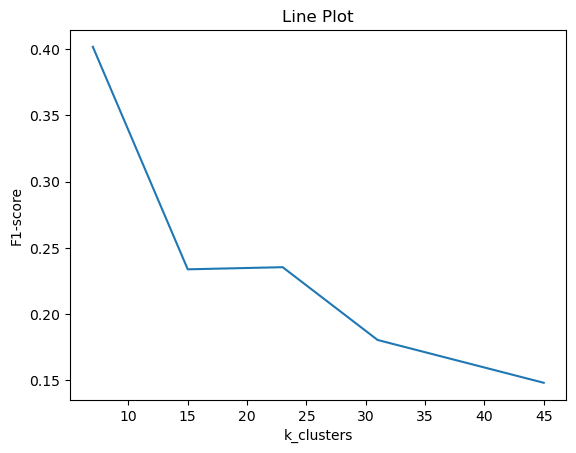

In [52]:
k_clusters=[7, 15, 23, 31,45]

plt.plot(k_clusters, F_scores_training)

# Customize the plot if necessary
plt.title("Line Plot")
plt.xlabel("k_clusters")
plt.ylabel("F1-score")

# Display the plot
plt.show()


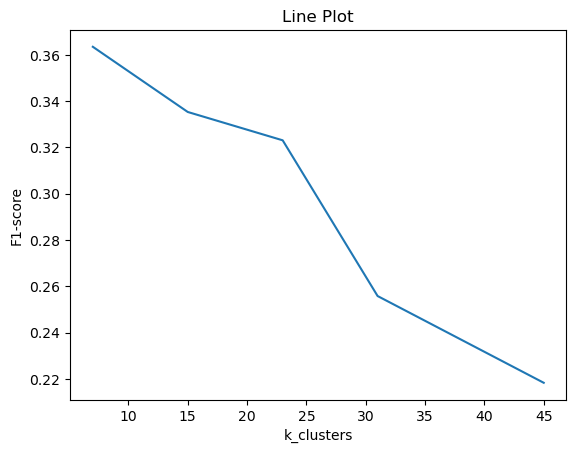

In [53]:
k_clusters=[7, 15, 23, 31,45]

plt.plot(k_clusters, F_scores_testing)

# Customize the plot if necessary
plt.title("Line Plot")
plt.xlabel("k_clusters")
plt.ylabel("F1-score")

# Display the plot
plt.show()


In [54]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

iris_df = pd.DataFrame(data=iris_dataset['data'], columns=iris_dataset['feature_names'])

iris_df['class'] = iris_dataset['target']

In [55]:
iris_df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [56]:
#split the data
X_train_iris=iris_df.drop(['class'],axis=1).values
y_train_iris=iris_df[['class']].values

scaler = MinMaxScaler(feature_range=(0, 1),copy=True)

# Normalize the data
X_train_iris = scaler.fit_transform(X_train_iris)

In [57]:
#testing with iris data
test_model=K_Means(k=3)
centriods,clusters_members=test_model.fit(X_train_iris)


  1%|          | 2/300 [00:00<00:01, 239.80it/s]

centroid moved = 0.9386095479539818
centroid moved = 0.034636712093605596
centroid moved = 0.0
K-means converged after 2 iterations


In [58]:
clusters_members

{0: [53,
  54,
  55,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  71,
  72,
  73,
  74,
  75,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  101,
  106,
  113,
  119,
  121,
  133,
  134,
  142],
 1: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 2: [50,
  51,
  52,
  56,
  65,
  70,
  76,
  77,
  85,
  86,
  100,
  102,
  103,
  104,
  105,
  107,
  108,
  109,
  110,
  111,
  112,
  114,
  115,
  116,
  117,
  118,
  120,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  143,
  144,
  145,
  146,
  147,
  148,
  149]}

In [59]:
majority_clusters=max_matching(clusters_members,y_train_iris)
print(f'training clusters (majority) {majority_clusters}')

training clusters (majority) {0: [1, 40], 1: [0, 50], 2: [2, 42]}


In [60]:
f1=evaluation(clusters_members,majority_clusters,y_train_iris)

presicion : 
[0.8333333333333334, 1.0, 0.8076923076923077]

recall : 
[0.8, 1.0, 0.84]

F_1 score : 
0.8799519807923168

the conditional entropy of T given clustering C
[0.6500224216483541, 0.0, 0.7062740891876007]

entropy : 
0.4528488591791749



In [61]:
for i,x in clusters_members.items():
    print(f'for cluster {i} size is ={len(clusters_members[i])}')

for cluster 0 size is =48
for cluster 1 size is =50
for cluster 2 size is =52


In [62]:
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the data
kmeans.fit(X_train_iris)


KMeans(n_clusters=3)

In [63]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [64]:
cluster0=list(np.where(kmeans.labels_==0)[0])
cluster1=list(np.where(kmeans.labels_==1)[0])
cluster2=list(np.where(kmeans.labels_==2)[0])

In [65]:
cluster0

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [66]:
clusters_members={0:cluster0,1:cluster1,2:cluster2}

In [67]:
majority_clusters=max_matching(clusters_members,y_train_iris)

In [68]:
for i,x in clusters_members.items():
    print(f'for cluster {i} size is ={len(clusters_members[i])}')

for cluster 0 size is =50
for cluster 1 size is =39
for cluster 2 size is =61


In [69]:
f1=evaluation(clusters_members,majority_clusters,y_train_iris)

presicion : 
[1.0, 0.9230769230769231, 0.7704918032786885]

recall : 
[1.0, 0.72, 0.94]

F_1 score : 
0.8852785369639302

the conditional entropy of T given clustering C
[0.0, 0.39124356362925566, 0.7771529943226336]

entropy : 
0.4177655442348108

